In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("/Users/nikkiruhil/Desktop/Internship/retail_store_sales.csv")
df.head(5)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [5]:
df.shape

(12575, 11)

In [6]:
df.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [7]:
df["Item"]=df["Item"].fillna("Unknown Item")

In [8]:
df["Price Per Unit"]=df["Total Spent"]/df["Quantity"]

In [9]:
df.loc[
    df["Price Per Unit"].isna(),
    ["Total Spent", "Quantity"]
].isna().sum()

Total Spent    604
Quantity       604
dtype: int64

In [10]:
df=df.dropna(subset=["Total Spent","Quantity","Price Per Unit"])

In [11]:
df.loc[:,"Discount Applied"]=df["Discount Applied"].fillna("False")

In [12]:
df.isnull().sum()

Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df["Transaction ID"].duplicated().sum()

0

In [15]:
df.dtypes

Transaction ID       object
Customer ID          object
Category             object
Item                 object
Price Per Unit      float64
Quantity            float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
Discount Applied     object
dtype: object

In [16]:
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors='coerce')

In [17]:
df["Year"]=df["Transaction Date"].dt.year
df["Month"]=df["Transaction Date"].dt.month
df["Day"]=df["Transaction Date"].dt.day
df["Weekday"]=df["Transaction Date"].dt.day_name()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11971 entries, 0 to 12574
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    11971 non-null  object        
 1   Customer ID       11971 non-null  object        
 2   Category          11971 non-null  object        
 3   Item              11971 non-null  object        
 4   Price Per Unit    11971 non-null  float64       
 5   Quantity          11971 non-null  float64       
 6   Total Spent       11971 non-null  float64       
 7   Payment Method    11971 non-null  object        
 8   Location          11971 non-null  object        
 9   Transaction Date  11971 non-null  datetime64[ns]
 10  Discount Applied  11971 non-null  object        
 11  Year              11971 non-null  int32         
 12  Month             11971 non-null  int32         
 13  Day               11971 non-null  int32         
 14  Weekday           11971 non

In [19]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Year,Month,Day,Weekday
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True,2024,4,8,Monday
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True,2023,7,23,Sunday
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False,2022,10,5,Wednesday
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,False,2022,5,7,Saturday
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False,2022,10,2,Sunday


In [20]:
(df["Quantity"] % 1 !=0).sum()

0

In [21]:
df.loc[:,"Quantity"]=df["Quantity"].astype(int)

In [22]:
Q1=df["Total Spent"].quantile(0.25)
Q3=df["Total Spent"].quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers=(df["Total Spent"]<lower_bound)| (df["Total Spent"]>upper_bound)
outlier_rows=df[outliers]
len(outlier_rows)

60

In [23]:
invalid_rows=df[
    (df["Price Per Unit"] <= 0)|
    (df["Quantity"] <= 0)|
    (df["Total Spent"] <= 0)
]

In [24]:
invalid_rows

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Year,Month,Day,Weekday


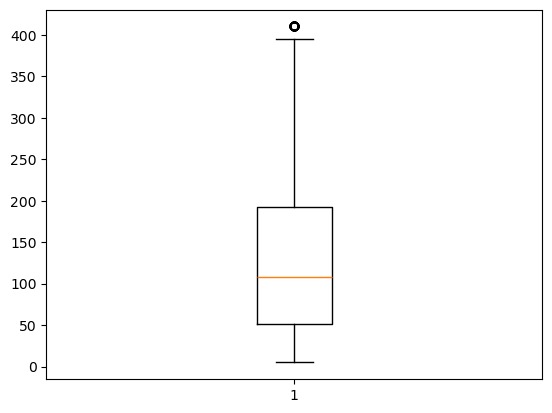

In [25]:
import matplotlib.pyplot as plt
plt.boxplot(df["Total Spent"])
plt.show()

In [26]:
df_cleaned = df[~outliers]

In [27]:
df.to_csv("cleaned_dataset.csv", index=False)

In [28]:
data_dict = pd.DataFrame({
    "Column Name": df_cleaned.columns,
    "Data Type": df_cleaned.dtypes,
    "Non-Null Count": df_cleaned.notnull().sum()
})

data_dict

,Column Name,Data Type,Non-Null Count
Transaction ID,Transaction ID,object,11911
Customer ID,Customer ID,object,11911
Category,Category,object,11911
Item,Item,object,11911
Price Per Unit,Price Per Unit,float64,11911
Quantity,Quantity,float64,11911
Total Spent,Total Spent,float64,11911
Payment Method,Payment Method,object,11911
Location,Location,object,11911
Transaction Date,Transaction Date,datetime64[ns],11911


In [29]:
data_dict["Meaning"] = [
    "Unique ID for transaction",
    "Unique ID for customer",
    "Product category purchased",
    "Name of the item purchased",
    "Price per unit of item",
    "Number of items purchased",
    "Total amount spent by customer",
    "Payment method used",
    "Location of customer",
    "Date of transaction",
    "Discount applied",
    "Year extracted from Transaction Date",
    "Month extracted from Transaction Date",
    "Day extracted from Transaction Date",
    "Weekday extracted from Transaction Date"
]

data_dict["Business Relevance"] = [
    "Track transactions",
    "Track customer behavior",
    "Understand popular categories",
    "Identify top-selling items",
    "Calculate sales metrics",
    "Analyze purchase quantities",
    "Revenue analysis",
    "Payment method analysis",
    "Regional sales analysis",
    "Time-based sales trends",
    "Impact of discounts on sales",
    "Analyze yearly trends",
    "Analyze monthly trends",
    "Analyze daily trends",
    "Analyze weekday trends"
]


In [30]:
data_dict.to_csv("data_dictionary.csv", index=False)